In [1]:
  %pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
import faker
from datetime import datetime

# Inicializar faker
fake = faker.Faker("es_ES")

# Definir rango de años y patrón de crecimiento
anios = list(range(1995, 2026))

registros = []
for anio in anios:
    # Calculate amount based on the year, starting from 119 in 1995 and increasing by 1 each year
    cantidad = 119 + (anio - 1995)

    for _ in range(cantidad):
        registros.append({
            "fecha_fallecimiento": fake.date_between_dates(date_start=datetime(anio, 1, 1), date_end=datetime(anio, 12, 31)),
            "edad": random.randint(0, 100),
            "sexo": random.choice(["Masculino", "Femenino", "Otro"]),
            "causa": random.choice(["Infarto", "Accidente", "Cáncer", "COVID-19", "Neumonía", "Otro"])
        })


# Opciones para algunas columnas
sexo = ["Masculino", "Femenino", "Otro"]
causas = ["Infarto", "Accidente", "Cáncer", "COVID-19", "Neumonía", "Otro"]
lugares = ["Hospital Central", "Domicilio", "Clínica Privada", "Vía Pública"]
ubicaciones = [f"Sección {random.randint(1,10)}, Fila {random.randint(1,20)}, Parcela {random.randint(1,50)}" for _ in range(len(registros))] # Use len(registros) for the number of locations
sepulturas = ["Tumba tradicional", "Mausoleo", "Nicho", "Cremación"]
responsables = [fake.name() for _ in range(15)]
comentarios_realistas = [
    "Se adjunta certificado médico.",
    "Familia solicita ceremonia sencilla.",
    "Se coordinó con la empresa funeraria local.",
    "La familia pidió sepultura junto a otros parientes.",
    "Documento entregado en oficina central.",
    "Pendiente entrega de certificado de defunción original.",
    "Se notificó al registro civil.",
    "Se pidió mantener la causa de fallecimiento en reserva.",
    "Acta firmada por dos testigos.",
    "La familia pidió servicio religioso antes de la cremación."
]


# Generar dataset ficticio with more columns
data = []
for registro in registros:  # Use the generated records
    causa = registro["causa"]
    fecha_fallecimiento = registro["fecha_fallecimiento"]
    data.append({
        "Marca temporal": fake.date_time_between(start_date=datetime.combine(fecha_fallecimiento, datetime.min.time()), end_date=datetime.combine(fecha_fallecimiento, datetime.max.time())),
        "Nombre y Apellido del fallecido": fake.name(),
        "Fecha de fallecimiento": fecha_fallecimiento,
        "DNI": fake.random_number(digits=8, fix_len=True),
        "Edad al fallecer": registro["edad"],
        "Sexo": registro["sexo"],
        "Hora de fallecimiento": fake.time(pattern="%H:%M"),
        "Causa de fallecimiento": causa,
        "Causa detallada (si es 'Otro')": random.choice([
            "Complicaciones posoperatorias",
            "Insuficiencia renal",
            "Septicemia",
            "Otro no especificado"
        ]) if causa == "Otro" else "",
        "Lugar de fallecimiento": random.choice(lugares),
        "Ubicación en el cementerio": random.choice(ubicaciones),
        "Tipo de sepultura": random.choice(sepulturas),
        "Número de acta / registro": fake.random_number(digits=6, fix_len=True),
        "Nombre del responsable que registra": random.choice(responsables),
        "DNI del responsable que registra": fake.random_int(min=10000000, max=50000000),
        "Correo electrónico del responsable": fake.email(),
        "Otros aportes o comentarios": random.choice(comentarios_realistas)

    })

df = pd.DataFrame(data)


# Save the generated dataset
df.to_csv("dataset_fallecimientos_ficticio.csv", index=False, encoding="utf-8-sig")

df.head()


,Marca temporal,Nombre y Apellido del fallecido,Fecha de fallecimiento,DNI,Edad al fallecer,Sexo,Hora de fallecimiento,Causa de fallecimiento,Causa detallada (si es 'Otro'),Lugar de fallecimiento,Ubicación en el cementerio,Tipo de sepultura,Número de acta / registro,Nombre del responsable que registra,DNI del responsable que registra,Correo electrónico del responsable,Otros aportes o comentarios
0,1995-11-16 14:17:48.890170,Josefina Reig Sastre,1995-11-16,70606340,31,Femenino,20:09,Accidente,,Clínica Privada,"Sección 8, Fila 11, Parcela 44",Cremación,282740,Marino César Quintero Lago,48204687,gustavocarbajo@example.org,La familia pidió servicio religioso antes de l...
1,1995-04-16 23:46:12.362077,Donato Huertas Arana,1995-04-16,89299543,44,Otro,19:53,COVID-19,,Hospital Central,"Sección 6, Fila 2, Parcela 12",Cremación,737932,Marco Aguirre-Iniesta,25668692,ribaspia@example.net,La familia pidió sepultura junto a otros parie...
2,1995-10-22 21:36:44.102183,Miguela Malo Noguera,1995-10-22,22139912,97,Masculino,00:06,Infarto,,Vía Pública,"Sección 10, Fila 11, Parcela 4",Tumba tradicional,103643,Nando Milla Ríos,18076560,cipriano15@example.net,Se coordinó con la empresa funeraria local.
3,1995-01-19 12:11:12.215475,Maribel Hervia Palomar,1995-01-19,73061073,56,Otro,03:56,Neumonía,,Hospital Central,"Sección 3, Fila 3, Parcela 4",Mausoleo,374574,Juanita de Rovira,16717981,teresitabarriga@example.com,La familia pidió servicio religioso antes de l...
4,1995-07-02 20:53:28.769403,Agustina Caparrós Sobrino,1995-07-02,16211087,58,Masculino,15:11,Infarto,,Hospital Central,"Sección 5, Fila 6, Parcela 31",Mausoleo,945979,Hilario Robledo-Parra,24926339,juan-franciscochaves@example.net,Se pidió mantener la causa de fallecimiento en...


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4154 entries, 0 to 4153
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Marca temporal                       4154 non-null   datetime64[ns]
 1   Nombre y Apellido del fallecido      4154 non-null   object        
 2   Fecha de fallecimiento               4154 non-null   object        
 3   DNI                                  4154 non-null   int64         
 4   Edad al fallecer                     4154 non-null   int64         
 5   Sexo                                 4154 non-null   object        
 6   Hora de fallecimiento                4154 non-null   object        
 7   Causa de fallecimiento               4154 non-null   object        
 8   Causa detallada (si es 'Otro')       4154 non-null   object        
 9   Lugar de fallecimiento               4154 non-null   object        
 10  Ubicación en

,Marca temporal,DNI,Edad al fallecer,Número de acta / registro,DNI del responsable que registra
count,4154,4.154000e+03,4154.000000,4154.000000,4.154000e+03
mean,2011-02-04 18:03:26.605780992,5.439777e+07,49.553442,547513.781416,3.005207e+07
min,1995-01-02 20:52:54.751958,1.000007e+07,0.000000,100003.000000,1.000094e+07
25%,2003-06-19 08:28:11.740713472,3.144956e+07,24.000000,320187.250000,2.004298e+07
50%,2011-05-11 10:32:55.691643648,5.447268e+07,50.000000,544658.000000,3.018447e+07
75%,2018-11-23 06:45:27.737070336,7.686902e+07,75.000000,772095.500000,3.982505e+07
max,2025-12-29 15:49:10.548118,9.997998e+07,100.000000,999762.000000,4.999147e+07
std,NaN,2.601662e+07,29.373852,261088.640229,1.147613e+07


DUPLICADOS Y VALORES NULOS

In [4]:
df.describe(include="all")


,Marca temporal,Nombre y Apellido del fallecido,Fecha de fallecimiento,DNI,Edad al fallecer,Sexo,Hora de fallecimiento,Causa de fallecimiento,Causa detallada (si es 'Otro'),Lugar de fallecimiento,Ubicación en el cementerio,Tipo de sepultura,Número de acta / registro,Nombre del responsable que registra,DNI del responsable que registra,Correo electrónico del responsable,Otros aportes o comentarios
count,4154,4154,4154,4.154000e+03,4154.000000,4154,4154,4154,4154,4154,4154,4154,4154.000000,4154,4.154000e+03,4154,4154
unique,NaN,4154,3484,NaN,NaN,3,1355,6,5,4,2328,4,NaN,15,NaN,4149,10
top,NaN,Eutimio Sobrino Angulo,2010-05-25,NaN,NaN,Femenino,13:20,Otro,,Clínica Privada,"Sección 10, Fila 5, Parcela 46",Tumba tradicional,NaN,Hilario Robledo-Parra,NaN,frobledo@example.org,Familia solicita ceremonia sencilla.
freq,NaN,1,4,NaN,NaN,1410,9,748,3406,1079,8,1055,NaN,302,NaN,2,437
mean,2011-02-04 18:03:26.605780992,NaN,NaN,5.439777e+07,49.553442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547513.781416,NaN,3.005207e+07,NaN,NaN
min,1995-01-02 20:52:54.751958,NaN,NaN,1.000007e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100003.000000,NaN,1.000094e+07,NaN,NaN
25%,2003-06-19 08:28:11.740713472,NaN,NaN,3.144956e+07,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320187.250000,NaN,2.004298e+07,NaN,NaN
50%,2011-05-11 10:32:55.691643648,NaN,NaN,5.447268e+07,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544658.000000,NaN,3.018447e+07,NaN,NaN
75%,2018-11-23 06:45:27.737070336,NaN,NaN,7.686902e+07,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772095.500000,NaN,3.982505e+07,NaN,NaN
max,2025-12-29 15:49:10.548118,NaN,NaN,9.997998e+07,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999762.000000,NaN,4.999147e+07,NaN,NaN


In [5]:
df.duplicated().sum()   # duplicados
df.isna().sum()          # valores nulos


,0
Marca temporal,0
Nombre y Apellido del fallecido,0
Fecha de fallecimiento,0
DNI,0
Edad al fallecer,0
Sexo,0
Hora de fallecimiento,0
Causa de fallecimiento,0
Causa detallada (si es 'Otro'),0
Lugar de fallecimiento,0


In [6]:
# Data cleaning and feature engineering
df["Fecha de fallecimiento"] = pd.to_datetime(df["Fecha de fallecimiento"])
df["Marca temporal"] = pd.to_datetime(df["Marca temporal"])
df["Sexo"] = df["Sexo"].str.capitalize()
df["Causa de fallecimiento"] = df["Causa de fallecimiento"].str.capitalize()
df['Sexo'] = df['Sexo'].astype('category')
df['Causa de fallecimiento'] = df['Causa de fallecimiento'].astype('category')
df['Tipo de sepultura'] = df['Tipo de sepultura'].astype('category')


df['Año de fallecimiento'] = df['Fecha de fallecimiento'].dt.year
df['Mes de fallecimiento'] = df['Fecha de fallecimiento'].dt.month
# Categorizar edad con más detalle
bins = [0, 12, 17, 30, 60, 100]
labels = ['Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
df['Rango edad'] = pd.cut(df['Edad al fallecer'], bins=bins, labels=labels, right=True)


# Crear nuevas columnas útiles
df['Año de fallecimiento'] = df['Fecha de fallecimiento'].dt.year
df['Mes de fallecimiento'] = df['Fecha de fallecimiento'].dt.month

# Categorizar edad

df['Rango edad'] = pd.cut(df['Edad al fallecer'], bins=bins, labels=labels)

# Mostrar primeras filas con nuevas columnas
df[['Nombre y Apellido del fallecido', 'Edad al fallecer', 'Rango edad', 'Sexo',
    'Fecha de fallecimiento', 'Año de fallecimiento', 'Mes de fallecimiento',
    'Causa de fallecimiento', 'Tipo de sepultura']].head(10)


,Nombre y Apellido del fallecido,Edad al fallecer,Rango edad,Sexo,Fecha de fallecimiento,Año de fallecimiento,Mes de fallecimiento,Causa de fallecimiento,Tipo de sepultura
0,Josefina Reig Sastre,31,Adulto,Femenino,1995-11-16,1995,11,Accidente,Cremación
1,Donato Huertas Arana,44,Adulto,Otro,1995-04-16,1995,4,Covid-19,Cremación
2,Miguela Malo Noguera,97,Adulto mayor,Masculino,1995-10-22,1995,10,Infarto,Tumba tradicional
3,Maribel Hervia Palomar,56,Adulto,Otro,1995-01-19,1995,1,Neumonía,Mausoleo
4,Agustina Caparrós Sobrino,58,Adulto,Masculino,1995-07-02,1995,7,Infarto,Mausoleo
5,Cebrián del Calzada,17,Adolescente,Otro,1995-08-23,1995,8,Infarto,Nicho
6,Cornelio Lorenzo Blanca,71,Adulto mayor,Otro,1995-02-16,1995,2,Cáncer,Mausoleo
7,Flor Mur Cañellas,33,Adulto,Otro,1995-11-08,1995,11,Infarto,Tumba tradicional
8,Florentina Exposito Codina,62,Adulto mayor,Masculino,1995-08-28,1995,8,Neumonía,Nicho
9,Sol Lucena Sanabria,10,Niño,Masculino,1995-09-12,1995,9,Accidente,Mausoleo


In [7]:
df["Causa de fallecimiento"].value_counts()  # Conteo por causa
df["Sexo"].value_counts()  # Conteo por sexo
df["Rango edad"].value_counts()  # Conteo por rango de edad


,count
Rango edad,
Adulto mayor,1626
Adulto,1236
Niño,536
Joven,506
Adolescente,201


MAYORES DE 60 AÑOS AL FALLECER


In [8]:
df[df["Edad al fallecer"] > 60]


,Marca temporal,Nombre y Apellido del fallecido,Fecha de fallecimiento,DNI,Edad al fallecer,Sexo,Hora de fallecimiento,Causa de fallecimiento,Causa detallada (si es 'Otro'),Lugar de fallecimiento,Ubicación en el cementerio,Tipo de sepultura,Número de acta / registro,Nombre del responsable que registra,DNI del responsable que registra,Correo electrónico del responsable,Otros aportes o comentarios,Año de fallecimiento,Mes de fallecimiento,Rango edad
2,1995-10-22 21:36:44.102183,Miguela Malo Noguera,1995-10-22,22139912,97,Masculino,00:06,Infarto,,Vía Pública,"Sección 10, Fila 11, Parcela 4",Tumba tradicional,103643,Nando Milla Ríos,18076560,cipriano15@example.net,Se coordinó con la empresa funeraria local.,1995,10,Adulto mayor
6,1995-02-16 19:50:50.520977,Cornelio Lorenzo Blanca,1995-02-16,18195925,71,Otro,18:26,Cáncer,,Domicilio,"Sección 10, Fila 18, Parcela 46",Mausoleo,827371,Raúl Ponce Río,47114628,severobarba@example.org,Acta firmada por dos testigos.,1995,2,Adulto mayor
8,1995-08-28 09:48:12.575675,Florentina Exposito Codina,1995-08-28,20255524,62,Masculino,21:05,Neumonía,,Domicilio,"Sección 9, Fila 20, Parcela 42",Nicho,464909,Valentín de Sanz,33979961,fernandosarmiento@example.net,Se adjunta certificado médico.,1995,8,Adulto mayor
10,1995-12-15 11:32:42.014141,Teodoro Prado Pino,1995-12-15,47248540,74,Otro,22:49,Infarto,,Vía Pública,"Sección 3, Fila 9, Parcela 24",Mausoleo,290447,Anastasia Pina Chico,31138968,scueto@example.net,Se pidió mantener la causa de fallecimiento en...,1995,12,Adulto mayor
12,1995-01-23 13:52:54.478561,Leonardo Borrego-Granados,1995-01-23,28180470,66,Masculino,09:10,Infarto,,Hospital Central,"Sección 10, Fila 19, Parcela 15",Tumba tradicional,104702,Nando Milla Ríos,12729341,faraujo@example.net,La familia pidió sepultura junto a otros parie...,1995,1,Adulto mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,2025-04-26 05:47:35.011434,Sebastian Bermejo Paniagua,2025-04-26,83356837,82,Masculino,23:00,Neumonía,,Domicilio,"Sección 2, Fila 14, Parcela 21",Cremación,204807,Paca Larrañaga Morante,34723221,carlitorosales@example.net,Se adjunta certificado médico.,2025,4,Adulto mayor
4145,2025-11-30 06:13:30.503397,Corona Marco-Paniagua,2025-11-30,12485803,80,Masculino,04:15,Covid-19,,Clínica Privada,"Sección 9, Fila 2, Parcela 50",Tumba tradicional,733991,Anastasia Pina Chico,33002825,ksanjuan@example.net,Pendiente entrega de certificado de defunción ...,2025,11,Adulto mayor
4148,2025-09-17 02:42:15.727816,Jose Ignacio Coll-Coronado,2025-09-17,27318390,98,Masculino,09:22,Cáncer,,Hospital Central,"Sección 2, Fila 16, Parcela 12",Nicho,576966,Nacio Gilabert Barrios,38834107,pascualbou@example.com,Se coordinó con la empresa funeraria local.,2025,9,Adulto mayor
4149,2025-09-06 21:51:35.672109,Natalia María Manuela Guardia Galindo,2025-09-06,77483503,65,Otro,16:14,Otro,Otro no especificado,Hospital Central,"Sección 7, Fila 15, Parcela 38",Mausoleo,562127,Marino César Quintero Lago,42343177,mariaprada@example.net,Se notificó al registro civil.,2025,9,Adulto mayor


CANTIDAD DE FALLECIDOS POR AÑO


In [9]:
df.groupby("Año de fallecimiento").size()

,0
Año de fallecimiento,
1995,119
1996,120
1997,121
1998,122
1999,123
2000,124
2001,125
2002,126
2003,127


In [10]:
df["Causa de fallecimiento"].value_counts()  # Conteo por causa
df["Sexo"].value_counts()  # Conteo por sexo
df["Rango edad"].value_counts()  # Conteo por rango de edad

,count
Rango edad,
Adulto mayor,1626
Adulto,1236
Niño,536
Joven,506
Adolescente,201


In [11]:
df["Sexo"].value_counts()

,count
Sexo,
Femenino,1410
Otro,1374
Masculino,1370


In [35]:
# Información general del DataFrame
df.info()

# Primeras filas
df.head(5)

# Estadísticas descriptivas de variables numéricas
df.describe()

# Estadísticas de variables categóricas
df.describe(include='category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4154 entries, 0 to 4153
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Marca temporal                       4154 non-null   datetime64[ns]
 1   Nombre y Apellido del fallecido      4154 non-null   object        
 2   Fecha de fallecimiento               4154 non-null   datetime64[ns]
 3   DNI                                  4154 non-null   int64         
 4   Edad al fallecer                     4154 non-null   int64         
 5   Sexo                                 4154 non-null   category      
 6   Hora de fallecimiento                4154 non-null   object        
 7   Causa de fallecimiento               4154 non-null   category      
 8   Causa detallada (si es 'Otro')       4154 non-null   object        
 9   Lugar de fallecimiento               4154 non-null   object        
 10  Ubicación en

,Sexo,Causa de fallecimiento,Tipo de sepultura,Rango edad
count,4154,4154,4154,4105
unique,3,6,4,5
top,Femenino,Otro,Tumba tradicional,Adulto mayor
freq,1410,748,1055,1626


Distribución de fallecimientos por año

/tmp/ipython-input-522178483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Año de fallecimiento', data=df, palette='coolwarm')


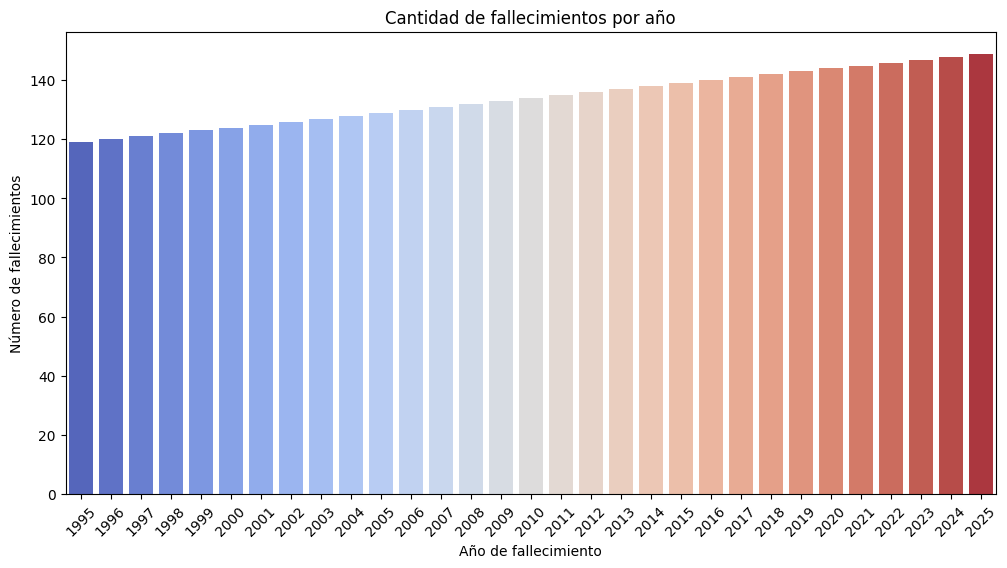

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cantidad de fallecimientos por año

plt.figure(figsize=(12,6))
sns.countplot(x='Año de fallecimiento', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Cantidad de fallecimientos por año')
plt.ylabel('Número de fallecimientos')
plt.show()


Distribución por sexo y rango de edad

/tmp/ipython-input-3382896545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sexo', data=df, palette='pastel')


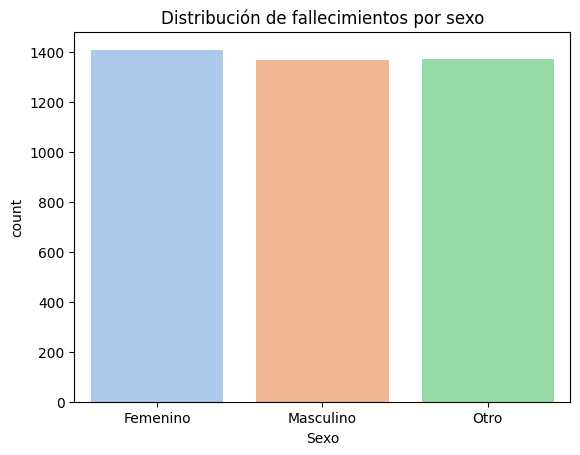

/tmp/ipython-input-3382896545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rango edad', data=df, palette='muted', order=['Niño','Adolescente','Joven','Adulto','Adulto mayor'])


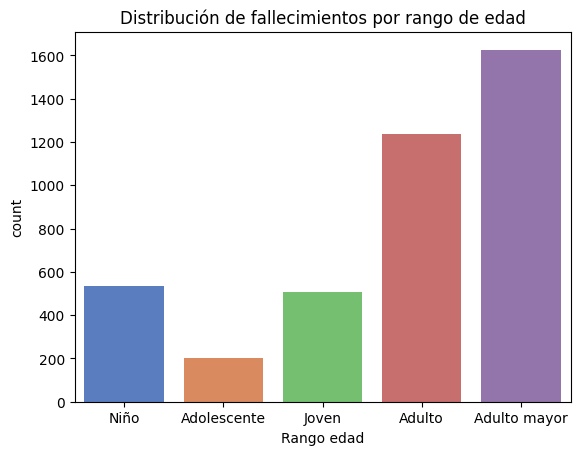

In [14]:
# Fallecimientos por sexo
sns.countplot(x='Sexo', data=df, palette='pastel')
plt.title('Distribución de fallecimientos por sexo')
plt.show()

# Fallecimientos por rango de edad
sns.countplot(x='Rango edad', data=df, palette='muted', order=['Niño','Adolescente','Joven','Adulto','Adulto mayor'])
plt.title('Distribución de fallecimientos por rango de edad')
plt.show()


Causas de fallecimiento más frecuentes

/tmp/ipython-input-1276189167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=causas_freq.index, y=causas_freq.values, palette='Set2')


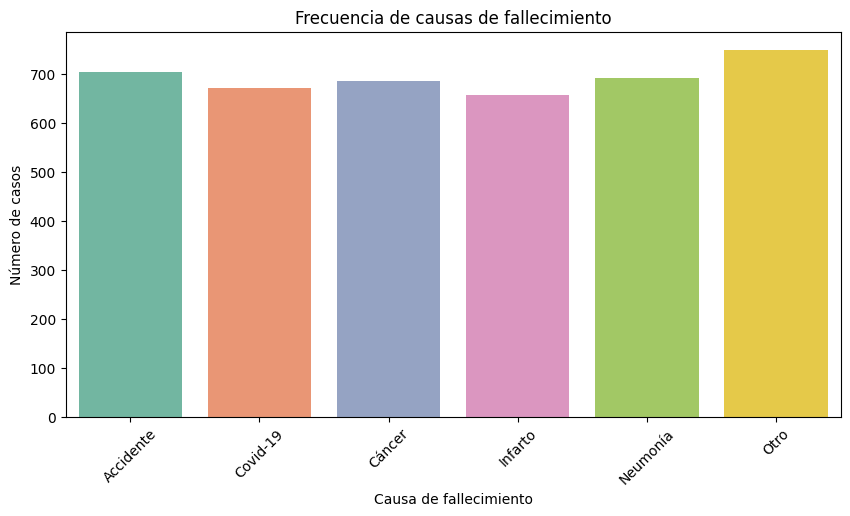

In [15]:
# Top causas
causas_freq = df['Causa de fallecimiento'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=causas_freq.index, y=causas_freq.values, palette='Set2')
plt.title('Frecuencia de causas de fallecimiento')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.show()


Temporalidad: mes y día de la semana

/tmp/ipython-input-1036439798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mes de fallecimiento', data=df, palette='cool')


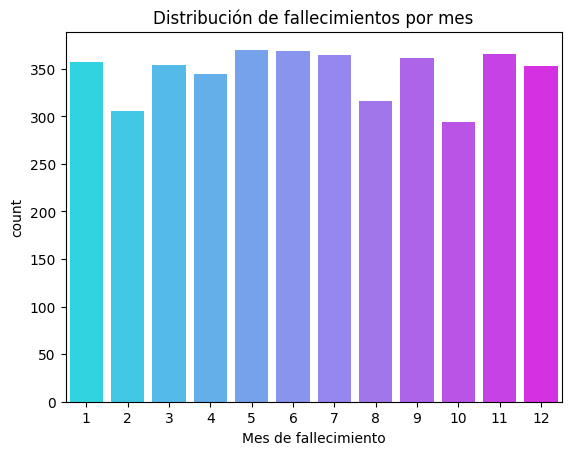

/tmp/ipython-input-1036439798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Día de la semana', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')


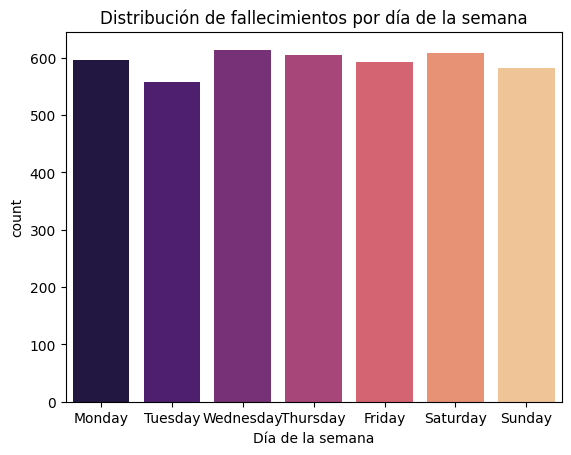

In [16]:
# Fallecimientos por mes
sns.countplot(x='Mes de fallecimiento', data=df, palette='cool')
plt.title('Distribución de fallecimientos por mes')
plt.show()

# Día de la semana
df['Día de la semana'] = df['Fecha de fallecimiento'].dt.day_name()
sns.countplot(x='Día de la semana', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')
plt.title('Distribución de fallecimientos por día de la semana')
plt.show()


Correlaciones y relaciones entre variables

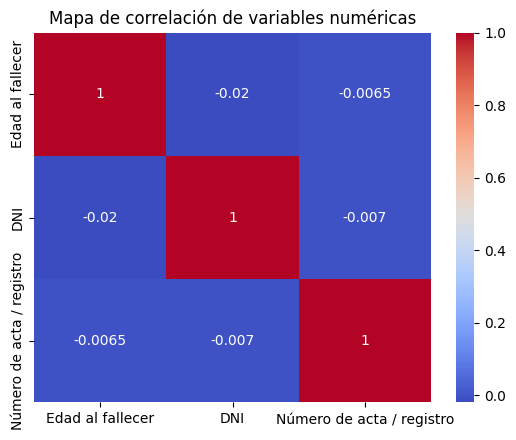

In [17]:
# Correlación de variables numéricas
corr = df[['Edad al fallecer','DNI','Número de acta / registro']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación de variables numéricas')
plt.show()


Cruces interesantes (Insights iniciales)

Edad vs Causa de fallecimiento

/tmp/ipython-input-1684492943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Causa de fallecimiento', y='Edad al fallecer', data=df, palette='Set3')


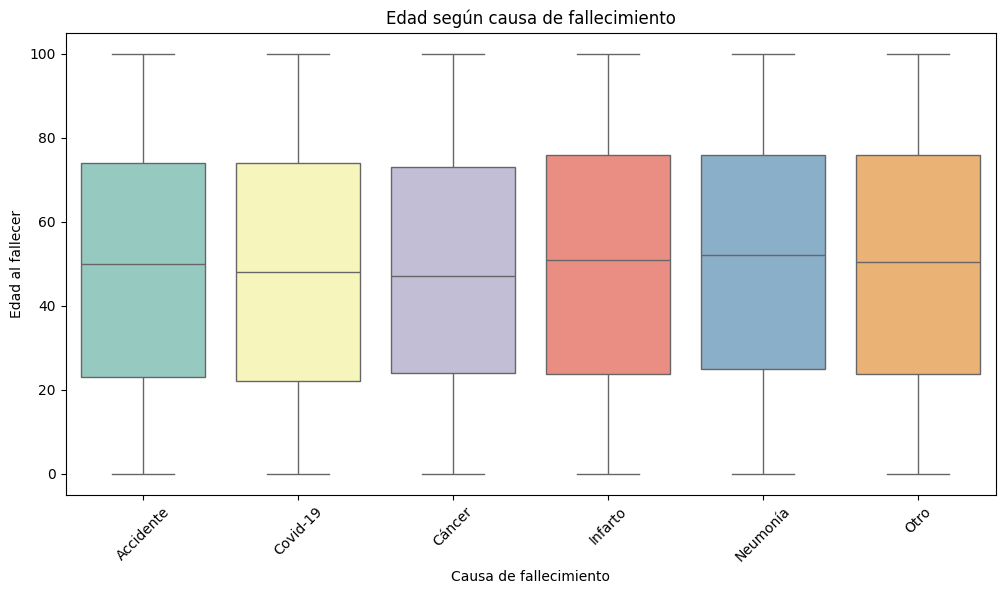

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Causa de fallecimiento', y='Edad al fallecer', data=df, palette='Set3')
plt.title('Edad según causa de fallecimiento')
plt.xticks(rotation=45)
plt.show()


Sexo vs Causa de fallecimiento

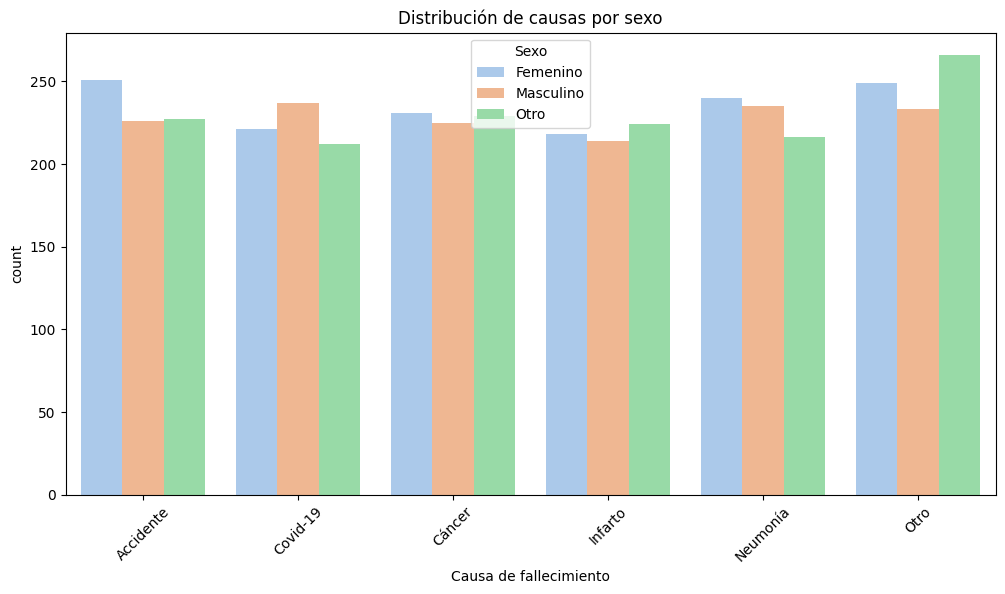

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='Causa de fallecimiento', hue='Sexo', data=df, palette='pastel')
plt.title('Distribución de causas por sexo')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Elegir un año, ejemplo 2020
anio_filtro = 2020
df_anio = df[df['Año de fallecimiento'] == anio_filtro]

print(f"Registros de fallecimientos en {anio_filtro}: {len(df_anio)}")
df_anio.head()


Registros de fallecimientos en 2020: 144


,Marca temporal,Nombre y Apellido del fallecido,Fecha de fallecimiento,DNI,Edad al fallecer,Sexo,Hora de fallecimiento,Causa de fallecimiento,Causa detallada (si es 'Otro'),Lugar de fallecimiento,...,Tipo de sepultura,Número de acta / registro,Nombre del responsable que registra,DNI del responsable que registra,Correo electrónico del responsable,Otros aportes o comentarios,Año de fallecimiento,Mes de fallecimiento,Rango edad,Día de la semana
3275,2020-04-06 21:11:58.339034,Leocadia Orozco Gallart,2020-04-06,32251929,82,Femenino,19:47,Covid-19,,Vía Pública,...,Mausoleo,925401,Nacio Gilabert Barrios,48250396,estevezrosalina@example.org,La familia pidió servicio religioso antes de l...,2020,4,Adulto mayor,Monday
3276,2020-05-13 21:38:48.699019,Gabino Pinilla Cervera,2020-05-13,29199537,60,Otro,08:25,Covid-19,,Domicilio,...,Mausoleo,578227,Raúl Ponce Río,29719991,pia58@example.net,Se pidió mantener la causa de fallecimiento en...,2020,5,Adulto,Wednesday
3277,2020-05-27 11:52:55.736224,Fortunato Contreras Moles,2020-05-27,79963533,42,Femenino,20:47,Infarto,,Domicilio,...,Nicho,493672,Hilario Robledo-Parra,24715099,rzorrilla@example.com,Se coordinó con la empresa funeraria local.,2020,5,Adulto,Wednesday
3278,2020-04-03 14:53:14.316921,Aurelia Bellido Iñiguez,2020-04-03,51937845,22,Femenino,03:51,Accidente,,Vía Pública,...,Nicho,456361,Paca Larrañaga Morante,32845111,basilioisern@example.com,La familia pidió sepultura junto a otros parie...,2020,4,Joven,Friday
3279,2020-05-02 22:18:58.605124,Isidoro Ayllón Colomer,2020-05-02,90248875,24,Otro,21:43,Cáncer,,Vía Pública,...,Tumba tradicional,138568,Nando Milla Ríos,25276297,felipepazos@example.org,Pendiente entrega de certificado de defunción ...,2020,5,Joven,Saturday


In [21]:
# Descripción general
df_anio.describe()

# Frecuencia de categorías
df_anio['Sexo'].value_counts()
df_anio['Rango edad'].value_counts()
df_anio['Causa de fallecimiento'].value_counts()


,count
Causa de fallecimiento,
Accidente,33
Neumonía,26
Otro,24
Infarto,24
Covid-19,22
Cáncer,15


/tmp/ipython-input-2541580052.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sexo', data=df_anio, palette='pastel')


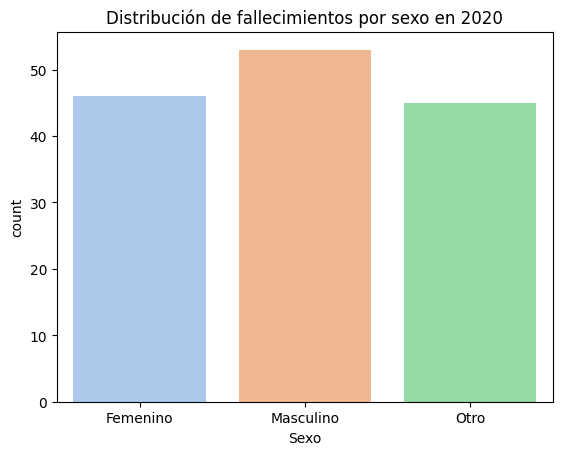

In [22]:
sns.countplot(x='Sexo', data=df_anio, palette='pastel')
plt.title(f'Distribución de fallecimientos por sexo en {anio_filtro}')
plt.show()


Distribución por rango de edad

/tmp/ipython-input-1560208784.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rango edad', data=df_anio, palette='muted',


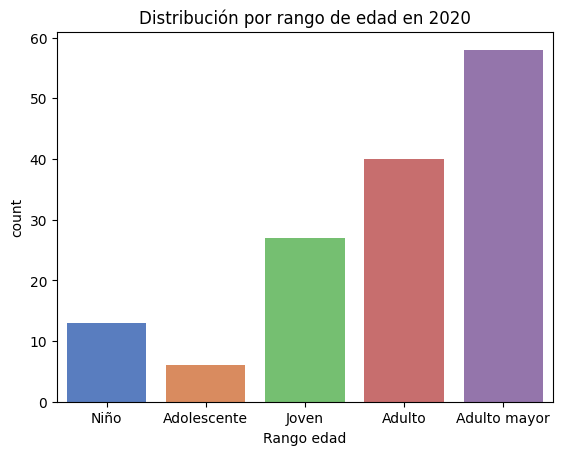

In [23]:
sns.countplot(x='Rango edad', data=df_anio, palette='muted',
              order=['Niño','Adolescente','Joven','Adulto','Adulto mayor'])
plt.title(f'Distribución por rango de edad en {anio_filtro}')
plt.show()


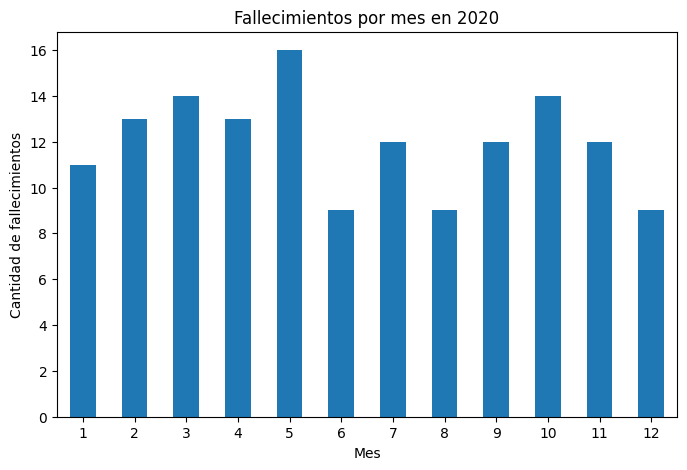

In [37]:
import matplotlib.pyplot as plt

# Filtrar solo el año 2020
df_2020 = df[df['Fecha de fallecimiento'].dt.year == 2020]

# Agrupar por mes
fallecimientos_mes = df_2020.groupby(df_2020['Fecha de fallecimiento'].dt.month).size()

# Graficar
plt.figure(figsize=(8,5))
fallecimientos_mes.plot(kind='bar')
plt.title("Fallecimientos por mes en 2020")
plt.xlabel("Mes")
plt.ylabel("Cantidad de fallecimientos")
plt.xticks(rotation=0)
plt.show()

In [24]:
df.to_csv('dataset_fallecimientos_simulado.csv', index=False)


In [25]:
# Guardar en CSV
df.to_csv("dataset_fallecimientos_ficticio.csv", index=False, encoding="utf-8-sig")


In [26]:
from google.colab import files
files.download('dataset_fallecimientos_simulado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>